In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('D:\\prasad\\practice\\My Working Projects\\diabetes')

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

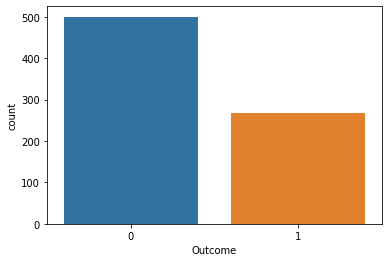

In [10]:
sns.countplot(df.Outcome)

#### check the how age and pregnancies affect the Outcome i.e. daibetes

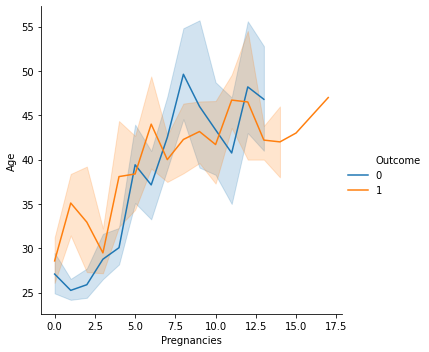

In [11]:
sns.relplot('Pregnancies','Age',data=df,kind='line',hue='Outcome')

#### Lets check at what blood pressure Outcome is positive

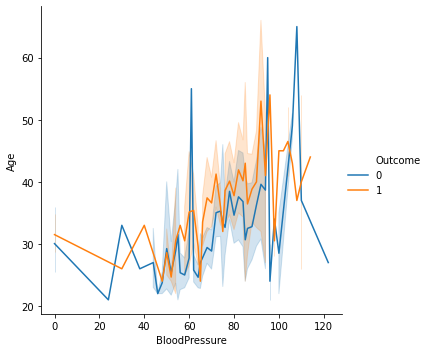

In [12]:
sns.relplot('BloodPressure','Age',data=df,hue='Outcome',kind='line')

Pregnancies : 0.8999119408414357


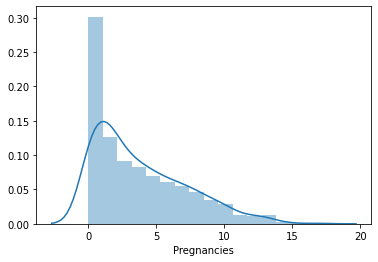

Glucose : 0.17341395519987735


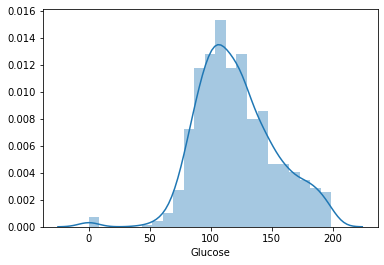

BloodPressure : -1.8400052311728738


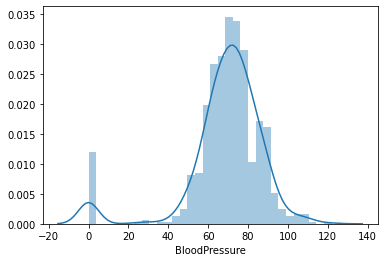

SkinThickness : 0.109158762323673


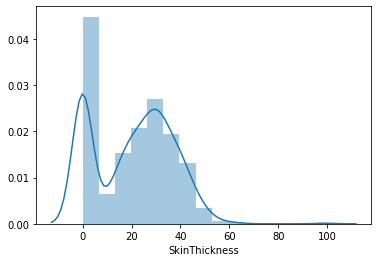

Insulin : 2.2678104585131753


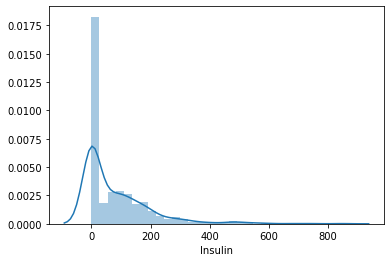

BMI : -0.42814327880861786


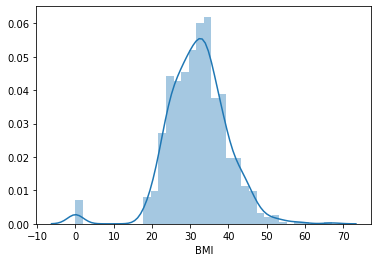

DiabetesPedigreeFunction : 1.9161592037386292


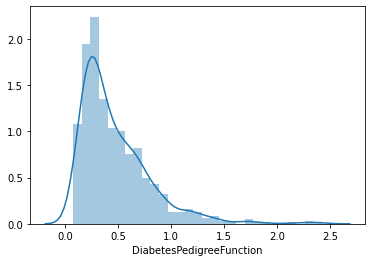

Age : 1.127389259531697


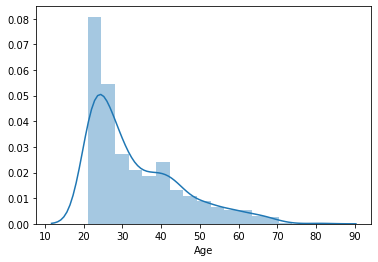

Outcome : 0.6337757030614577


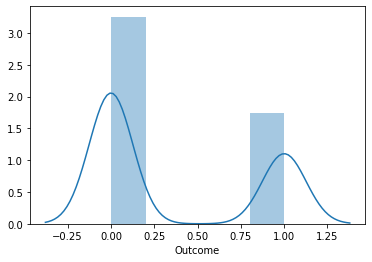

In [13]:
from scipy.stats import skew
for col in df:
    print(col,':',skew(df[col]))
    sns.distplot(df[col])
    plt.show()

## Split data into train & test
split the dependent and independent variable 
where x contain all independent variable and y contain dependent or traget variable

In [14]:
X=df.iloc[:,:-1]

In [15]:
y=df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

### Lets create a Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,r2_score

In [20]:
cv=cross_val_score(LogisticRegression(),X_train,y_train,cv=5)
print('Total Splits',cv)
print('Average',np.average(cv))

Total Splits [0.75609756 0.82926829 0.7398374  0.7398374  0.78688525]
Average 0.7703851792616286


In [21]:
cv=cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)
print('Total Splits',cv)
print('Average',np.average(cv))

Total Splits [0.76422764 0.82113821 0.77235772 0.73170732 0.75409836]
Average 0.7687058509929362


In [22]:
cv=cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=5)
print('Total Splits',cv)
print('Average',np.average(cv))

Total Splits [0.72357724 0.75609756 0.67479675 0.72357724 0.71311475]
Average 0.7182327069172331


In [23]:
cv=cross_val_score(SVC(),X_train,y_train,cv=5)
print('Total Splits',cv)
print('Average',np.average(cv))

Total Splits [0.71544715 0.79674797 0.75609756 0.7398374  0.75409836]
Average 0.7524456883913102


In [24]:
cv=cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=5)
print('Total Splits',cv)
print('Average',np.average(cv))

Total Splits [0.70731707 0.72357724 0.69918699 0.72357724 0.73770492]
Average 0.7182726909236306


In [25]:
cv=cross_val_score(GaussianNB(),X_train,y_train,cv=5)
print('Total Splits',cv)
print('Average',np.average(cv))

Total Splits [0.73170732 0.79674797 0.7398374  0.72357724 0.7704918 ]
Average 0.752472344395575


In [26]:
cv=cross_val_score(MultinomialNB(),X_train,y_train,cv=5)
print('Total Splits',cv)
print('Average',np.average(cv))

Total Splits [0.50406504 0.59349593 0.67479675 0.58536585 0.69672131]
Average 0.6108889777422364


In [27]:
cv=cross_val_score(XGBClassifier(),X_train,y_train,cv=5)
print('Total Splits',cv)
print('Average',np.average(cv))

Total Splits [0.73170732 0.7804878  0.70731707 0.75609756 0.73770492]
Average 0.7426629348260696


In [28]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7272727272727273


In [29]:
cm=confusion_matrix(y_test,y_pred)

In [30]:
cm

array([[78, 21],
       [21, 34]], dtype=int64)

<AxesSubplot:>

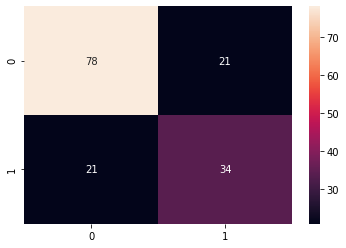

In [31]:
sns.heatmap(cm,annot=True)

In [32]:
rf.score(X_test,y_test)

0.7272727272727273

In [33]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7467532467532467


In [34]:
lr.score(X_test,y_test)

0.7467532467532467

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



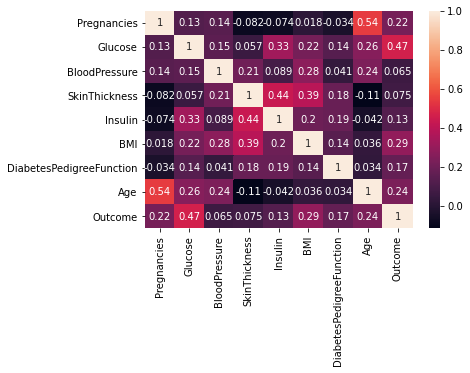

In [36]:
sns.heatmap(data=df.corr(),annot=True);

#### Again Check the model using Scaling data

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [38]:
ms=MinMaxScaler()

In [39]:
X_train_ms=ms.fit_transform(X_train)
X_test_ms=ms.fit_transform(X_test)

In [40]:
X_train_ms=pd.DataFrame(X_train_ms,columns=X_train.columns)
X_test_ms=pd.DataFrame(X_test_ms,columns=X_test.columns)

In [41]:
lrms=LogisticRegression()
lrms.fit(X_train_ms,y_train)
y_pred=lrms.predict(X_test_ms)
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7597402597402597


In [42]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7467532467532467


### Lets check our model works perfact or not by giving some mannual input

In [43]:
X1=np.array([1,2,3,4,5,6,7,8]).reshape(1,8)

In [44]:
lr.predict(X1)

array([0], dtype=int64)

In [45]:
X_train_ms.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
1,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
2,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
3,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
4,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


In [46]:
X2=np.array([0.117647,0.422111,0.000000,0.000000,0.000000,0.0000000,0.096499,0.000000]).reshape(1,8)

In [47]:
lr.predict(X2)

array([0], dtype=int64)

In [48]:
X3=np.array([0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333]).reshape(1,8)

In [49]:
lr.predict(X3)

array([0], dtype=int64)

In [50]:
True_count=len(df.loc[df['Outcome']==1])
False_count=len(df.loc[df['Outcome']==0])

In [51]:
print(True_count,False_count)

268 500


#### Check How many Missing(Zero) values

In [52]:
print('Number of Rows Missing Pregnancies: {}'.format(len(df.loc[df['Pregnancies']==0])))
print('Number of Rows Missing Glucose: {}'.format(len(df.loc[df['Glucose']==0])))
print('Number of Rows Missing BloodPressure: {}'.format(len(df.loc[df['BloodPressure']==0])))
print('Number of Rows Missing SkinThickness: {}'.format(len(df.loc[df['SkinThickness']==0])))
print('Number of Rows Missing Insulin: {}'.format(len(df.loc[df['Insulin']==0])))
print('Number of Rows Missing BMI: {}'.format(len(df.loc[df['BMI']==0])))
print('Number of Rows Missing DiabetesPedigreeFunction: {}'.format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print('Number of Rows Missing Age: {}'.format(len(df.loc[df['Age']==0])))

Number of Rows Missing Pregnancies: 111
Number of Rows Missing Glucose: 5
Number of Rows Missing BloodPressure: 35
Number of Rows Missing SkinThickness: 227
Number of Rows Missing Insulin: 374
Number of Rows Missing BMI: 11
Number of Rows Missing DiabetesPedigreeFunction: 0
Number of Rows Missing Age: 0


#### Fill Missing Value(Zero)

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
imputer=SimpleImputer(missing_values=0,strategy='mean')

In [55]:
X_train_impute=imputer.fit_transform(X_train)
X_test_impute=imputer.fit_transform(X_test)

In [56]:
X_train_impute=pd.DataFrame(X_train_impute,columns=X_train.columns)
X_test_impute=pd.DataFrame(X_test_impute,columns=X_test.columns)

In [57]:
X_train_impute.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.000000,84.0,72.238983,28.59589,154.330247,32.352224,0.304,21.0
1,9.000000,112.0,82.000000,24.00000,154.330247,28.200000,1.282,50.0
2,1.000000,139.0,46.000000,19.00000,83.000000,28.700000,0.654,22.0
3,4.393881,161.0,50.000000,28.59589,154.330247,21.900000,0.254,65.0
4,6.000000,134.0,80.000000,37.00000,370.000000,46.200000,0.238,46.0


In [58]:
lr_impute=LogisticRegression()
lr_impute.fit(X_train_impute,y_train)
y_pred=lr_impute.predict(X_test_impute)
print('accuracy_score:',accuracy_score(y_test,y_pred))

accuracy_score: 0.7597402597402597


#### Again Check the model using Scaling data

In [59]:
ms=MinMaxScaler()

In [60]:
X_train_ms=ms.fit_transform(X_train_impute)
X_test_ms=ms.fit_transform(X_test_impute)

In [61]:
X_train_ms=pd.DataFrame(X_train_ms,columns=X_train_impute.columns)
X_test_ms=pd.DataFrame(X_test_ms,columns=X_test_impute.columns)

In [62]:
lrms=LogisticRegression()
lrms.fit(X_train_ms,y_train)
y_pred=lrms.predict(X_test_ms)
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.7207792207792207


In [63]:
cv=cross_val_score(LogisticRegression(),X_train_impute,y_train)
print(cv)
print('Average:',np.average(cv))

[0.74796748 0.81300813 0.75609756 0.75609756 0.77868852]
Average: 0.7703718512594963


In [64]:
cv=cross_val_score(LogisticRegression(),X_train_ms,y_train)
print(cv)
print('Average:',np.average(cv))

[0.73170732 0.80487805 0.7398374  0.7398374  0.7704918 ]
Average: 0.7573503931760628


## Final Selected Model

In [65]:
lr=LogisticRegression()
lr.fit(X_train_impute,y_train)
y_pred=lr.predict(X_test_impute)
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('cm:',confusion_matrix(y_test,y_pred))

accuracy_score: 0.7597402597402597
cm: [[82 17]
 [20 35]]


##### Check Cross Validation

In [66]:
cv=cross_val_score(LogisticRegression(),X_train_impute,y_train)
print('Num_Splits:',cv)
print('Average:',np.average(cv))

Num_Splits: [0.74796748 0.81300813 0.75609756 0.75609756 0.77868852]
Average: 0.7703718512594963


### Save Model Using Pickle & Joblib

In [67]:
import pickle
import joblib
from sklearn.externals import joblib

In [68]:
pickle.dump(lr,open('lr.pkl','wb'))

In [69]:
joblib.dump(lr,'lr.joblib')

['lr.joblib']

#### Load Pickle Model & Check the Accuracy

In [70]:
model=pickle.load(open('lr.pkl','rb'))

In [71]:
y_pred=model.predict(X_test_impute)
model.score(X_test_impute,y_test)

0.7597402597402597

In [72]:
print('accuracy_score:',accuracy_score(y_test,y_pred))

accuracy_score: 0.7597402597402597


In [73]:
model.score(X_train_impute,y_train)

0.7703583061889251

#### Load Joblib Model & Check the Accuracy

In [74]:
mj=joblib.load('lr.joblib')

In [75]:
mj.score(X_test_impute,y_test)

0.7597402597402597

In [76]:
mj.score(X_train_impute,y_train)

0.7703583061889251

In [77]:
data=np.array([0,137,40,35,168,43.1,2.288,33]).reshape(1,-1)

In [78]:
data=np.array([0,137,40,35,168,43.1,2.288,33]).reshape(1,8)
# data=np.array([0,137,40,35,168,43.1,2.288,33]).reshape(1,-1)

In [79]:
mj.predict(data)

array([1], dtype=int64)

In [80]:
data.shape

(1, 8)

In [81]:
data.ndim

2